# Machine Learning and Statistics 2022 Project
<hr style="border-top: 1px solid #001a79;" />
<h1 style="color: #001a79;">Anomaly Detection Using Keras</h1>

<hr style="border-top: 1px solid #001a79;" /> 

This project looks at the Keras time series anomaly detection. Keras is a high level, deep learning Application Programming Interface (API) developed for implementing neural networks. As it is python fronted it is realtively easy to work with. {*1*}
The time series code is taken from here [Keras Time Series](https://keras.io/examples/timeseries/timeseries_anomaly_detection/){*2*} 

As this code provides limited detail on explaining the code, I will attempt to expand on what is provided to provide a better explanation. 


In [1]:
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks.
import tensorflow.keras as keras

# layers of neural networks
from tensorflow.keras import layers

# Plotting
import matplotlib.pyplot as plt

Above is the importation of the libaries and packages needed to run the code. 
* Matplolib is a Python 20 plotting library which produces publication quality figures in a variety of hardcopy formats and interactive    enviroments across platforms. 

* NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

* Pandas is an open source, BDS-licenced libary providing high-oerfimance, easy-to-use data structures and data analysis tools. 

* TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of     tasks but has a particular focus on training and inference of deep neural networks.{*3*}





## Data

The data used comes from the links below:

Kaggle - https://www.kaggle.com/datasets/boltzmannbrain/nab

From the Kaggle page "The Numenta Anomaly Benchmark (NAB) is a novel benchmark for evaluating algorithms for anomaly detection in streaming, online applications. It is comprised of over 50 labeled real-world and artificial timeseries data files plus a novel scoring mechanism designed for real-time applications. All of the data and code is fully open-source, with extensive documentation, and a scoreboard of anomaly detection algorithms."
The full dataset is included here: Github - https://github.com/numenta/NAB 


The data set contains 2 CSV files small noise csv file and jumpsup csv file which are read in below using pandas

In [2]:
#Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

#Data file without anomaly.
no_anomaly_url = root_url +'artificialNoAnomaly/art_daily_small_noise.csv'

#Data file with anomaly.
with_anomaly_url = root_url +'artificialWithAnomaly/art_daily_jumpsup.csv'


In [3]:
#check that url is configured correctly for no anomaly
no_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

In [4]:
#check that url is configured correctly for no anomaly
with_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'

Look at Ians vidoe for narrative.........

In [5]:
#Reading in of csv file no anomaly with pandas.
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

In [6]:
#shows how much data is in the data set and its make up. 
df_small_noise.shape

(4032, 1)

In [7]:
df_small_noise.head()
#This is the displaying of the first five lines of the small noise csv. 

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [8]:
#the below function list out a summary of the small noise data set. 
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


The describe function allows for a quick summary of the large amount of data contained in the data set. 

In [9]:
# chekcing if the fist figure is correct or rounded
df_small_noise.iloc[0].values[0]

18.3249185392

In [10]:
#Reading in of csv file with anomaly with pandas.
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [11]:
#shows how much data is in the data set and its make up. 
df_daily_jumpsup.shape

(4032, 1)

In [12]:
df_daily_jumpsup.head()
#This is the displaying of the first five lines of the jumpsup csv. 

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [13]:
#the below function lists out a summary of the daily jumpsup data set. 
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


In [14]:
# chekcing if the fist figure is correct or rounded
df_daily_jumpsup.iloc[0].values[0]

19.761251903

The iloc function shows that both data sets have been rounded when the head function was used afert it being read in. 
small noise 18.3249185392 to 18.324919
daily jumpsup 19.761251903 to 19.761252

Below Pandas and Pyplot are used to display the data graphyically which makes it easier to see fluctuations.  

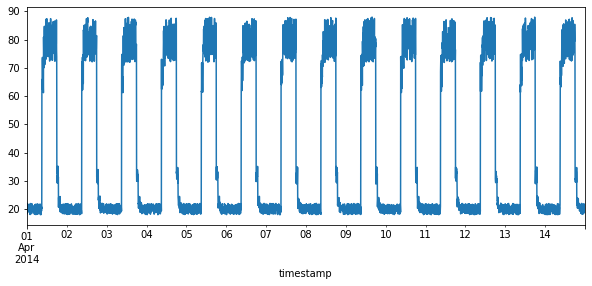

In [15]:
#This creates a plot and includes a figure size
fig, ax = plt.subplots(figsize=(10,4))
#Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax);

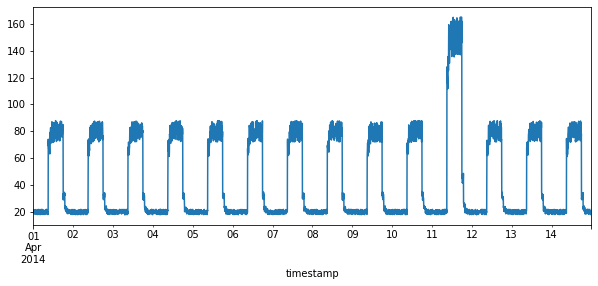

In [16]:
#This creates a plot and includes a figure size
fig, ax = plt.subplots(figsize=(10,4))
#Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax);

## Preprocessing

Here we are preparing the data of analysis.

In [17]:
# identifying the mean of the data set
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

In [18]:
# identifying the standard deviation of the data set
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

In [19]:
#Getting mean of the values in no anomaly data and then dividing by standard deviation
df_train_vals = (df_small_noise - train_mean) / train_std
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


In [20]:
#
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()
df_small_noise

,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173
...,...,...,...
2014-04-14 23:35:00,20.211195,-22.227159,-0.791647
2014-04-14 23:40:00,20.531041,-21.907313,-0.780255
2014-04-14 23:45:00,19.032127,-23.406226,-0.833640


In [21]:
df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()

(42.438353335806646, -7.342627387941552e-14, -2.616541242931684e-15)

In [22]:
df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()

(28.077122281262515, 28.077122281262508, 1.0000000000000018)

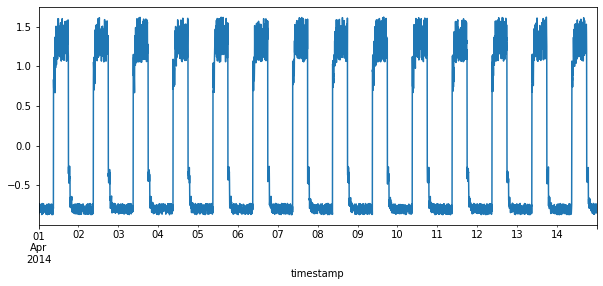

In [23]:
#This creates a plot and includes a figure size
fig,ax = plt.subplots(figsize=(10,4))

#Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);

In [24]:
#displays the number of training samples
df_train_vals.shape

(4032, 1)

In [25]:
#identifying the name of the columns
df_train_vals.columns


Index(['value'], dtype='object')

Columns are called value

In [26]:
#Gives the size of the windows
window_size = 288

Window example:
```python
[1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
window_size = 3
[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
...
```

In [56]:
#Window list example.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
#Example window size.
win_size = 3
#length of L.
len(L)

12

In [57]:
#number of windows from L.
len(L) - (win_size - 1)

10

In [59]:
#remove brackets.
len(L) - win_size + 1

10

In [60]:
#Print the windows.
for i in range (len(L) - win_size + 1):
    print (L[i:i +win_size])

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 1]
[7, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]


In [61]:
#For accumulating the windows.
wins = []
#Generate the windows
for i in range (len(L) - win_size + 1):
    wins.append(L[i:i + win_size])
wins

[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

In [62]:
#Create 2D array from wins
np.stack(wins)

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [27]:
# Generated training sequences for use in the model.
def windows(vals, N=window_size):
    #start with an empty list
    L = []
    #loops through all the possible windows
    for i in range(len(vals) - N + 1):
    #Append a window to the list
        L.append(vals[i:i + N])
    #stack them on display
    return np.stack(L )

In [28]:
#applying windows shape to the data set
x_train = windows(df_train_vals)

In [29]:
#show first and last values
x_train[0][0], x_train[0][-1]

(array([-0.85882857]), array([-0.79671155]))

In [30]:
#show first and last values using window size 
df_train_vals.iloc[0], df_train_vals.iloc[window_size -1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.796712
 Name: 2014-04-01 23:55:00, dtype: float64)

In [31]:
#To show how many windows and what size each window
x_train.shape

(3745, 288, 1)

From above we have 3745 windows of 288 size each 

# Neural Newtork

In [32]:
#creating the layers for the model
layers = [
  #adding attributes to build the keras model
  layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  #this creates a 1D convolution layer. 
  layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #applies dropout to the input at a particular rate
  layers.Dropout(rate=0.2),
  #this creates a 1D convolution layer
  layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #this creates a 1D convolution layer in the opposite direction.
  layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),   
  #applies dropout to the input at a particular rate
  layers.Dropout(rate=0.2),
  #this creates a 1D convolution layer in the opposite direction
  layers.Conv1DTranspose(
        filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),  
  #this creates a 1D convolution layer in the opposite direction
    layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

In [33]:
#putting the layers into the model
model = keras.Sequential(layers)
#optimizer 
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
# Gives layers and summary of the information.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 144, 32)           256       
_________________________________________________________________
dropout (Dropout)            (None, 144, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 72, 16)            3600      
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 144, 16)           1808      
_________________________________________________________________
dropout_1 (Dropout)          (None, 144, 16)           0         
_________________________________________________________________
conv1d_transpose_1 (Conv1DTr (None, 288, 32)           3616      
_________________________________________________________________
conv1d_transpose_2 (Conv1DTr (None, 288, 1)            2

In [34]:
#part of keras sequential training the model, history is a reocord of values
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    #this stops code running
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 110ms/step - loss: 0.4820 - val_loss: 0.0569
Epoch 2/50
27/27 [==============================] - 2s 82ms/step - loss: 0.0763 - val_loss: 0.0423
Epoch 3/50
27/27 [==============================] - 2s 81ms/step - loss: 0.0575 - val_loss: 0.0377
Epoch 4/50
27/27 [==============================] - 3s 100ms/step - loss: 0.0492 - val_loss: 0.0321
Epoch 5/50
27/27 [==============================] - 2s 75ms/step - loss: 0.0419 - val_loss: 0.0286
Epoch 6/50
27/27 [==============================] - 2s 80ms/step - loss: 0.0370 - val_loss: 0.0263
Epoch 7/50
27/27 [==============================] - 3s 128ms/step - loss: 0.0332 - val_loss: 0.0250
Epoch 8/50
27/27 [==============================] - 3s 94ms/step - loss: 0.0301 - val_loss: 0.0226TA: 0s - loss: 0.0
Epoch 9/50
27/27 [==============================] - 3s 93ms/step - loss: 0.0276 - val_loss: 0.0217
Epoch 10/50
27/27 [==============================] - 3s 107ms/step - loss: 0.0258 - val_

## Evaluation

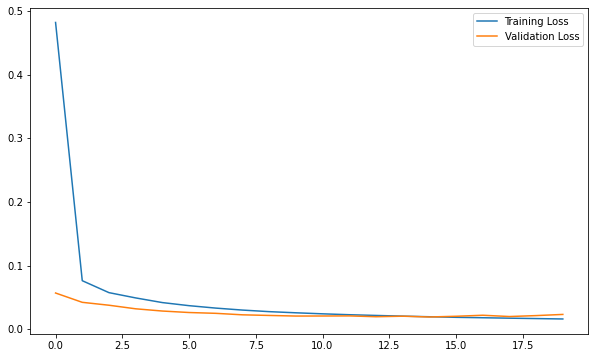

In [35]:
# history is displayed graphically of the Training and Validation loss values
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(history.history["loss"], label="Training Loss")
ax.plot(history.history["val_loss"], label="Validation Loss")
ax.legend();

In [36]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)

In [37]:
#Calculate loss
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

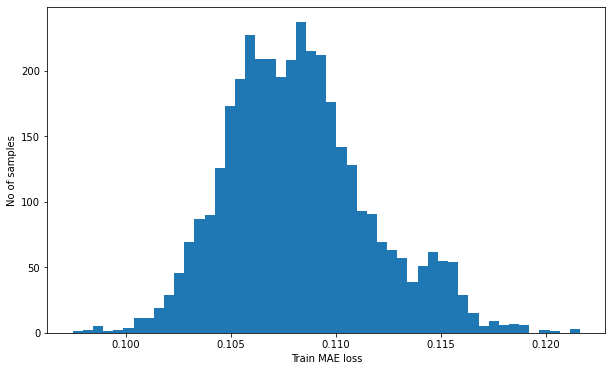

In [38]:
#Creating diagram
fig, ax = plt.subplots(figsize =(10,6))
#plotting histogram
ax.hist(train_mae_loss, bins=50)
# Label for X Axis
ax.set_xlabel("Train MAE loss")
#Label for Y Axis
ax.set_ylabel("No of samples");


In [39]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
#pritn out the threshold
threshold

0.12160845998235491

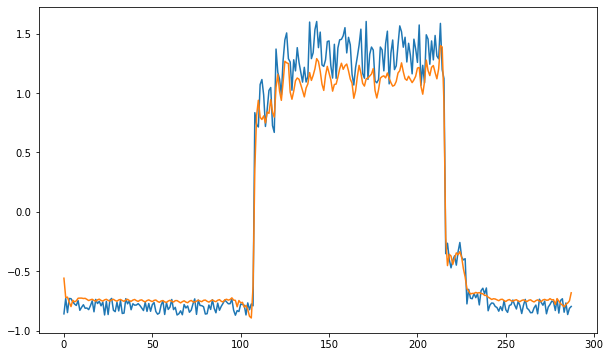

In [40]:
# Checking how the first sequence is learnt
#shaping the plot.
fir, ax = plt.subplots(figsize =(10,6))
#plotting training data
ax.plot(x_train[0])
#plotting predicted date
ax.plot(x_train_pred[0]);

In [41]:
df_test_value = (df_daily_jumpsup - train_mean) / train_std


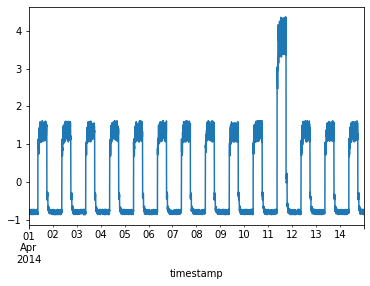

In [42]:
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax);


In [43]:
# Create sequences from test values.
x_test = windows(df_test_value.values)
print( x_test.shape)

(3745, 288, 1)


In [44]:
# Get test MAE loss.
x_test_pred = model.predict(x_test)

In [45]:
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss

array([[0.10257929],
       [0.10529808],
       [0.10455864],
       ...,
       [0.10771103],
       [0.10943752],
       [0.10808017]])

In [46]:
test_mae_loss = test_mae_loss.reshape((-1))

test_mae_loss



array([0.10257929, 0.10529808, 0.10455864, ..., 0.10771103, 0.10943752,
       0.10808017])

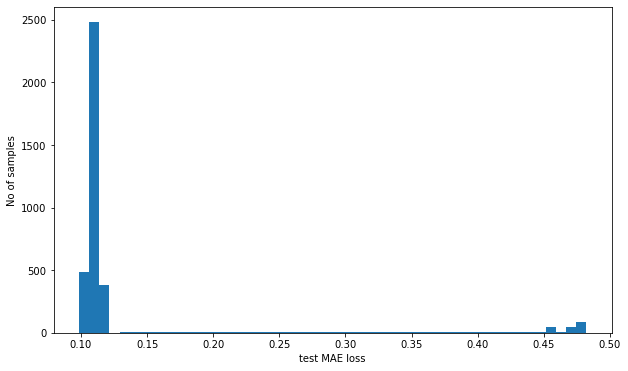

In [47]:
#
fig, ax = plt.subplots(figsize=(10,6))
#
ax.hist(test_mae_loss, bins=50)
#
ax.set_xlabel("test MAE loss")
#
ax.set_ylabel("No of samples");


In [48]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
#Number of anomalies
np.sum(anomalies)


396

In [49]:
#Indices of anomalies
np.where(anomalies)

(array([2522, 2698, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710,
        2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721,
        2722, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732,
        2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743,
        2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754,
        2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765,
        2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776,
        2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787,
        2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798,
        2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809,
        2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820,
        2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831,
        2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842,
        2843, 2844, 2845, 2846, 2847, 

In [50]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []
for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

In [51]:
#
df_subset = df_daily_jumpsup.iloc[inds]

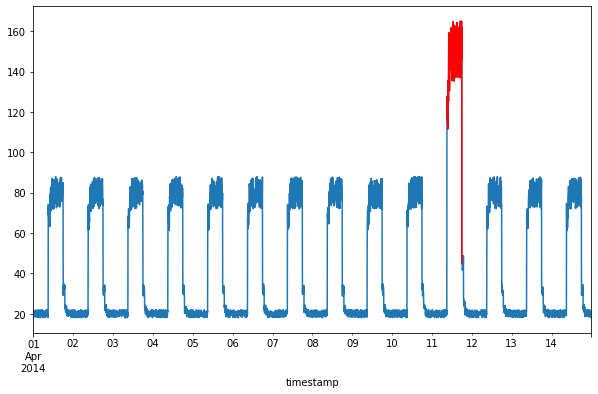

In [52]:
#
fig, ax = plt.subplots(figsize=(10,6))
#
df_daily_jumpsup.plot(legend=False, ax=ax)
#
df_subset.plot(legend=False, ax=ax, color="r");

## ***References***
I used ATU video Lectures by Ian McLoughlin and class notes to complete this work.
In addition I searched online using the following websites. 


1. [Simplilearn](https://www.simplilearn.com/tutorials/deep-learning-tutorial/what-is-keras)


2. [Keras Time Series](https://keras.io/examples/timeseries/timeseries_anomaly_detection/)


3. [Tensor Flow](https://en.wikipedia.org/wiki/TensorFlow)

The Keras user guide was used througout for comments.[Keras](https://keras.io/guides/)



